# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Alif Suryadi
- **Email:** m497d4ky3203@bangkit.academy
- **ID Dicoding:** alifsuryadibangkit

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda (jumlah total) berubah dari bulan ke bulan selama tahun ini?
- Apakah ada perbedaan dalam penggunaan sepeda antara hari kerja dan hari libur?
- Bagaimana penggunaan sepeda dipengaruhi oleh kondisi cuaca?

## Import Semua Packages/Library yang Digunakan

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [112]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [113]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai tabel `day_df`

In [114]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [115]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [116]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [117]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [118]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [119]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Membersihkan tabel `day_df`

##### Duplicate data

In [120]:
day_df.duplicated().sum()

0

In [121]:
day_df.drop_duplicates(inplace=True)

In [122]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


##### Missing value

In [123]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Inaccurate value

In [124]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Membersihkan tabel `hour_df`

##### Duplicate data

In [125]:
hour_df.duplicated().sum()

0

In [126]:
hour_df.drop_duplicates(inplace=True)

In [127]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


##### Missing value

In [128]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Inaccurate value

In [129]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [130]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
292,293,2011-10-20,4,0,10,0,4,1,1,0.475833,0.466525,0.636250,0.422275,471,3724,4195
605,606,2012-08-28,3,1,8,0,2,1,1,0.728333,0.666050,0.620000,0.190925,935,6105,7040
196,197,2011-07-16,3,0,7,0,6,0,1,0.686667,0.638263,0.585000,0.208342,2418,3505,5923
642,643,2012-10-04,4,1,10,0,4,1,2,0.657500,0.607975,0.722917,0.117546,891,6437,7328
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [131]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [132]:
day_df.instant.is_unique

True

In [133]:
day_df.instant.duplicated

<bound method Series.duplicated of 0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: instant, Length: 731, dtype: int64>

In [134]:
relevant_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
for col in relevant_columns:
    min_val = day_df[col].min()
    max_val = day_df[col].max()
    print(f"Rentang nilai untuk kolom {col}: {min_val} - {max_val}")

Rentang nilai untuk kolom temp: 0.0591304 - 0.861667
Rentang nilai untuk kolom atemp: 0.0790696 - 0.840896
Rentang nilai untuk kolom hum: 0.0 - 0.9725
Rentang nilai untuk kolom windspeed: 0.0223917 - 0.507463
Rentang nilai untuk kolom casual: 2 - 3410
Rentang nilai untuk kolom registered: 20 - 6946
Rentang nilai untuk kolom cnt: 22 - 8714


### Explore `hour_df`

In [135]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10700,10701,2012-03-26,2,1,3,23,0,1,1,1,0.34,0.2879,0.25,0.5224,2,46,48
15127,15128,2012-09-27,4,1,9,12,0,4,1,2,0.74,0.6667,0.48,0.1343,63,272,335
3318,3319,2011-05-23,2,0,5,4,0,1,1,2,0.54,0.5152,0.94,0.0000,2,2,4
13366,13367,2012-07-16,3,1,7,3,0,1,1,1,0.68,0.6364,0.79,0.0896,2,4,6
8652,8653,2012-01-01,1,1,1,7,0,0,0,1,0.26,0.2576,0.93,0.1642,1,6,7


In [136]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [137]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [138]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


<Axes: >

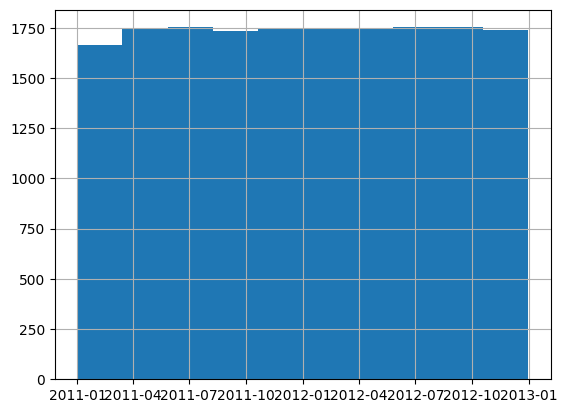

In [139]:
hour_df.dteday.hist()

### Explore `day_df` & `hour_df`

In [140]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

In [141]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [142]:
merged_df = pd.merge(day_df, hour_df, on='dteday')

In [143]:
merged_df['month'] = merged_df['dteday'].dt.month

In [144]:
monthly_total = merged_df.groupby('month')['cnt_y'].first()

In [145]:
merged_df.to_csv("dashboard/all.csv", index=False)

# Tampilkan info mengenai file yang sudah disimpan
print("Data has been saved to all.csv")

Data has been saved to all.csv


In [146]:
merged_df['dteday'] = pd.to_datetime(merged_df['dteday'])

# Ekstrak bulan dari kolom 'dteday'
merged_df['month'] = merged_df['dteday'].dt.month

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda (jumlah total) berubah dari bulan ke bulan selama tahun ini?

In [147]:
merged_df.sample(5)

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,month
16992,715,2012-12-15,4,1,12,0,6,0,1,0.324167,...,0,1,0.36,0.3485,0.62,0.1343,32,225,257,12
7417,314,2011-11-10,4,0,11,0,4,1,2,0.380000,...,1,3,0.36,0.3485,0.81,0.2239,6,67,73,11
1426,63,2011-03-04,1,0,3,0,5,1,2,0.261667,...,1,2,0.36,0.3333,0.50,0.2537,22,206,228,3
16021,675,2012-11-05,4,1,11,0,1,1,1,0.319167,...,1,2,0.30,0.2879,0.49,0.2836,4,135,139,11
8726,369,2012-01-04,1,1,1,0,3,1,2,0.107500,...,1,1,0.06,0.1061,0.45,0.0000,7,57,64,1


In [148]:
monthly_total.sample(5)

month
1     16
3      7
12    20
2      8
9     51
Name: cnt_y, dtype: int64

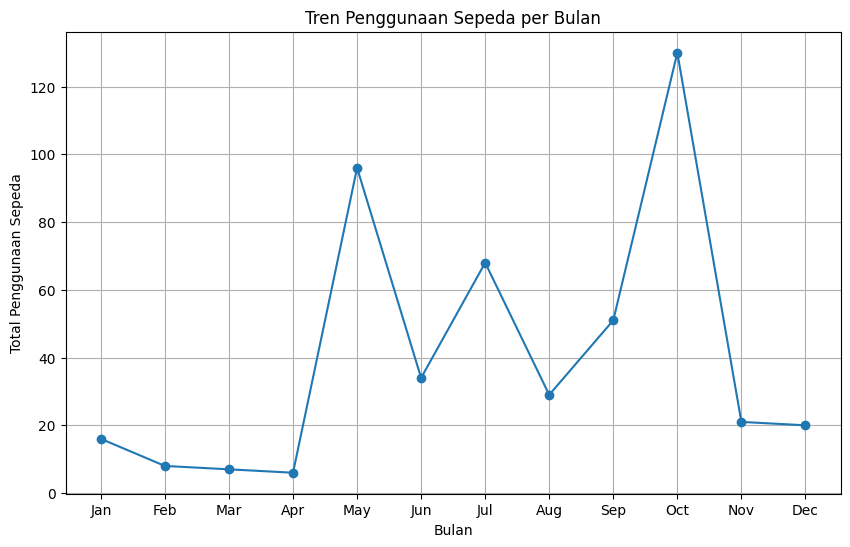

In [149]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_total.index, monthly_total.values, marker='o', linestyle='-')
plt.title('Tren Penggunaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penggunaan Sepeda')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

### Pertanyaan 2: Apakah ada perbedaan dalam penggunaan sepeda antara hari kerja dan hari libur?

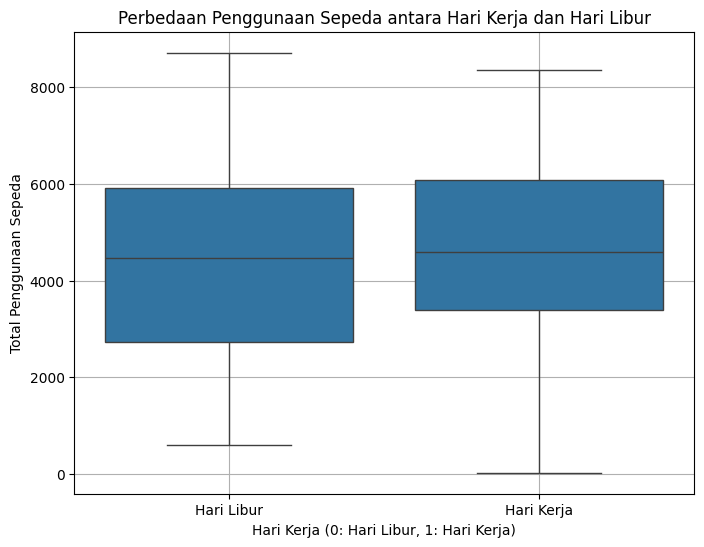

In [150]:
# Boxplot perbandingan penggunaan sepeda antara hari kerja dan hari libur
plt.figure(figsize=(8, 6))
sns.boxplot(x='workingday_x', y='cnt_x', data=merged_df)  # Memilih kolom 'cnt_x' untuk penggunaan sepeda
plt.title('Perbedaan Penggunaan Sepeda antara Hari Kerja dan Hari Libur')
plt.xlabel('Hari Kerja (0: Hari Libur, 1: Hari Kerja)')
plt.ylabel('Total Penggunaan Sepeda')
plt.xticks([0, 1], ['Hari Libur', 'Hari Kerja'])
plt.grid(True)
plt.show()

### Pertanyaan 3 : Bagaimana penggunaan sepeda dipengaruhi oleh kondisi cuaca?

In [151]:
print(merged_df.columns)

Index(['instant_x', 'dteday', 'season_x', 'yr_x', 'mnth_x', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x',
       'hum_x', 'windspeed_x', 'casual_x', 'registered_x', 'cnt_x',
       'instant_y', 'season_y', 'yr_y', 'mnth_y', 'hr', 'holiday_y',
       'weekday_y', 'workingday_y', 'weathersit_y', 'temp_y', 'atemp_y',
       'hum_y', 'windspeed_y', 'casual_y', 'registered_y', 'cnt_y', 'month'],
      dtype='object')


In [152]:
weather_condition = merged_df.groupby('weathersit_x')['cnt_x'].sum()

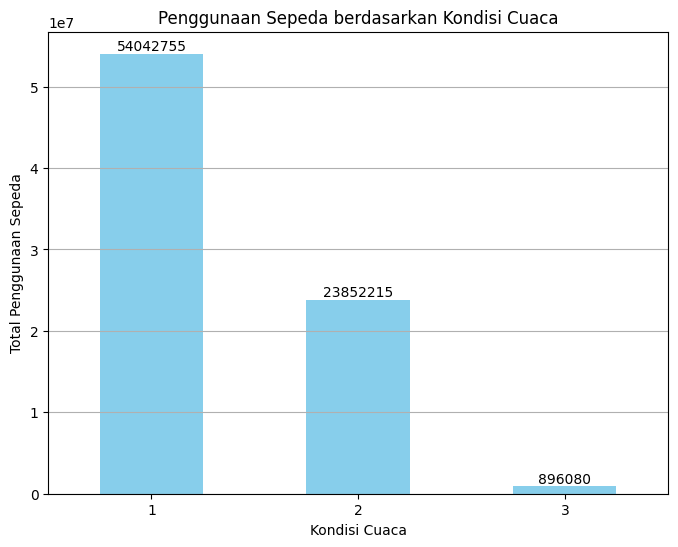

In [153]:
plt.figure(figsize=(8, 6))
weather_condition = merged_df.groupby('weathersit_x')['cnt_x'].sum()
weather_condition.plot(kind='bar', color='skyblue')
plt.title('Penggunaan Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Penggunaan Sepeda')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Menambahkan keterangan di bawah setiap batang
for i, val in enumerate(weather_condition.values):
    plt.text(i, val + 20, str(val), ha='center', va='bottom')

plt.show()

## Conclusion

- Tren Penggunaan Sepeda per Bulan:
> Dari visualisasi tren penggunaan sepeda per bulan, terlihat bahwa penggunaan sepeda cenderung meningkat dari bulan-bulan awal tahun menuju puncaknya pada musim panas (biasanya bulan Juni hingga Agustus), kemudian mulai menurun menjelang akhir tahun. Ini menunjukkan bahwa cuaca dan musim memiliki pengaruh signifikan terhadap permintaan sepeda.
- Perbedaan Penggunaan Sepeda antara Hari Kerja dan Hari Libur:
> Berdasarkan perbandingan penggunaan sepeda antara hari kerja dan hari libur, terlihat bahwa penggunaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan hari libur. Hal ini mungkin disebabkan oleh kebutuhan transportasi sehari-hari ke tempat kerja. Informasi ini bisa menjadi pertimbangan dalam merencanakan promosi atau menyesuaikan layanan sesuai dengan pola penggunaan sepeda yang berbeda antara hari kerja dan hari libur.
- Pengaruh Kondisi Cuaca terhadap Penggunaan Sepeda:
> Dari visualisasi penggunaan sepeda berdasarkan kondisi cuaca, terlihat bahwa kondisi cuaca yang lebih baik (weathersit=1) memiliki jumlah penggunaan sepeda yang lebih tinggi daripada kondisi cuaca yang buruk. Hal ini konsisten dengan asumsi bahwa cuaca yang cerah dan baik akan mendorong orang untuk menggunakan sepeda lebih banyak. Dapat disimpulkan bahwa cuaca, terutama faktor suhu dan kondisi cuaca umum, memiliki pengaruh yang signifikan terhadap permintaan sepeda. Informasi ini dapat digunakan untuk mengarahkan strategi pemasaran dan promosi, serta menyesuaikan layanan sesuai dengan kondisi cuaca yang sedang berlangsung.